# Análisis Exploratorio de Datos: Aguacate 🍐

## Introducción
En este análisis exploratorio examinaremos datos de ventas de aguacate en Estados Unidos. Exploraremos características clave como precios, volumen de ventas, tipo de aguacate y distribución regional para entender mejor los patrones presentes en los datos.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Carga de Datos y Revisión Inicial
Cargamos el conjunto de datos, revisamos su estructura y obtenemos una visión general de sus columnas, tipos de datos y estadísticos descriptivos.


In [68]:
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('data/avocado.csv', parse_dates=['Date'])

In [69]:
display(df.head())
display(df.info())
display(df.describe())

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


None

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
min,0.000000,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938


## Análisis de Datos Faltantes y Tipos de Datos
Verificamos cuántos valores no nulos hay por columna y los tipos de datos para identificar posibles problemas de calidad de datos.


In [70]:
# Tipos y non-null
col_info = pd.DataFrame({
    'column': df.columns,
    'dtype': df.dtypes,
    'non-null': df.notnull().sum()
})
display(col_info)

,column,dtype,non-null
Unnamed: 0,Unnamed: 0,int64,18249
Date,Date,datetime64[ns],18249
AveragePrice,AveragePrice,float64,18249
Total Volume,Total Volume,float64,18249
4046,4046,float64,18249
4225,4225,float64,18249
4770,4770,float64,18249
Total Bags,Total Bags,float64,18249
Small Bags,Small Bags,float64,18249
Large Bags,Large Bags,float64,18249


## Conteo de Categorías
Analizamos la cantidad de registros por tipo de aguacate, año y región para entender la composición del dataset.

In [71]:
# Conteos de categorías
types_count = df['type'].value_counts().rename_axis('type').reset_index(name='count')
year_count = df['year'].value_counts().rename_axis('year').reset_index(name='count')
region_count = df['region'].value_counts().rename_axis('region').reset_index(name='count')

display(types_count)
display(year_count)
display(region_count)

,type,count
0,conventional,9126
1,organic,9123


,year,count
0,2017,5722
1,2016,5616
2,2015,5615
3,2018,1296


,region,count
0,Albany,338
1,Atlanta,338
2,BaltimoreWashington,338
3,Boise,338
4,Boston,338
5,BuffaloRochester,338
6,California,338
7,Charlotte,338
8,Chicago,338
9,CincinnatiDayton,338


## Distribución de Variables Numéricas
Visualizamos histogramas para entender la distribución de las variables numéricas, como precios y volumen de ventas.

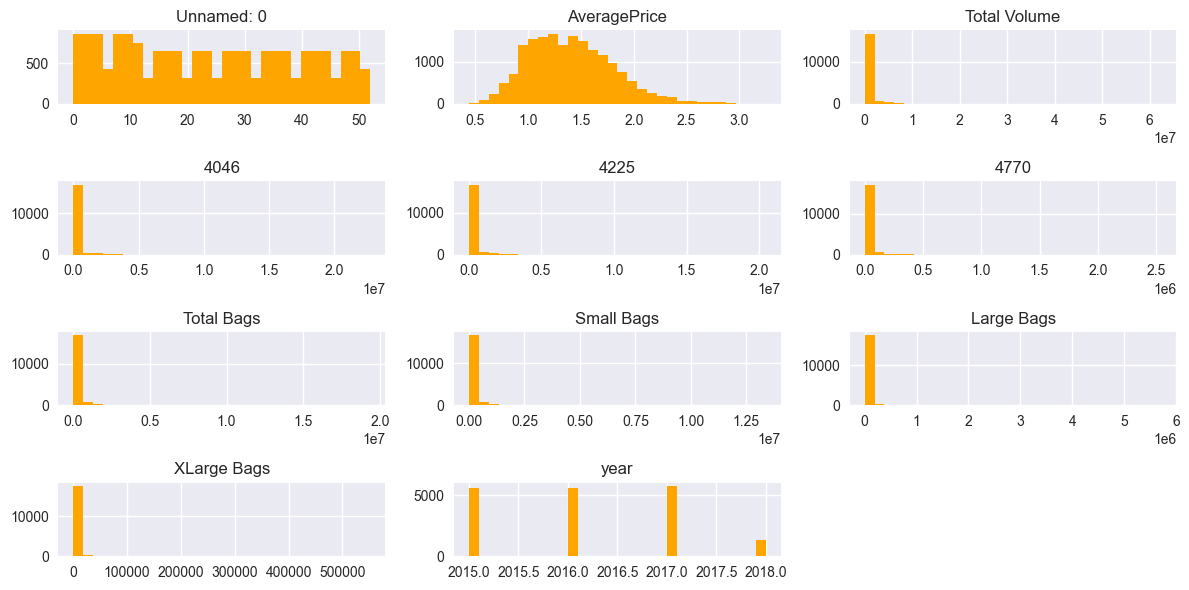

In [72]:

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
layout = (len(num_cols) // 3 + 1, 3)
df[num_cols].hist(bins=30, layout=layout, color='orange')
plt.tight_layout()
plt.show()

## Detección de Valores Atípicos
Utilizamos boxplots para identificar posibles outliers que puedan influir en el análisis o modelos posteriores.


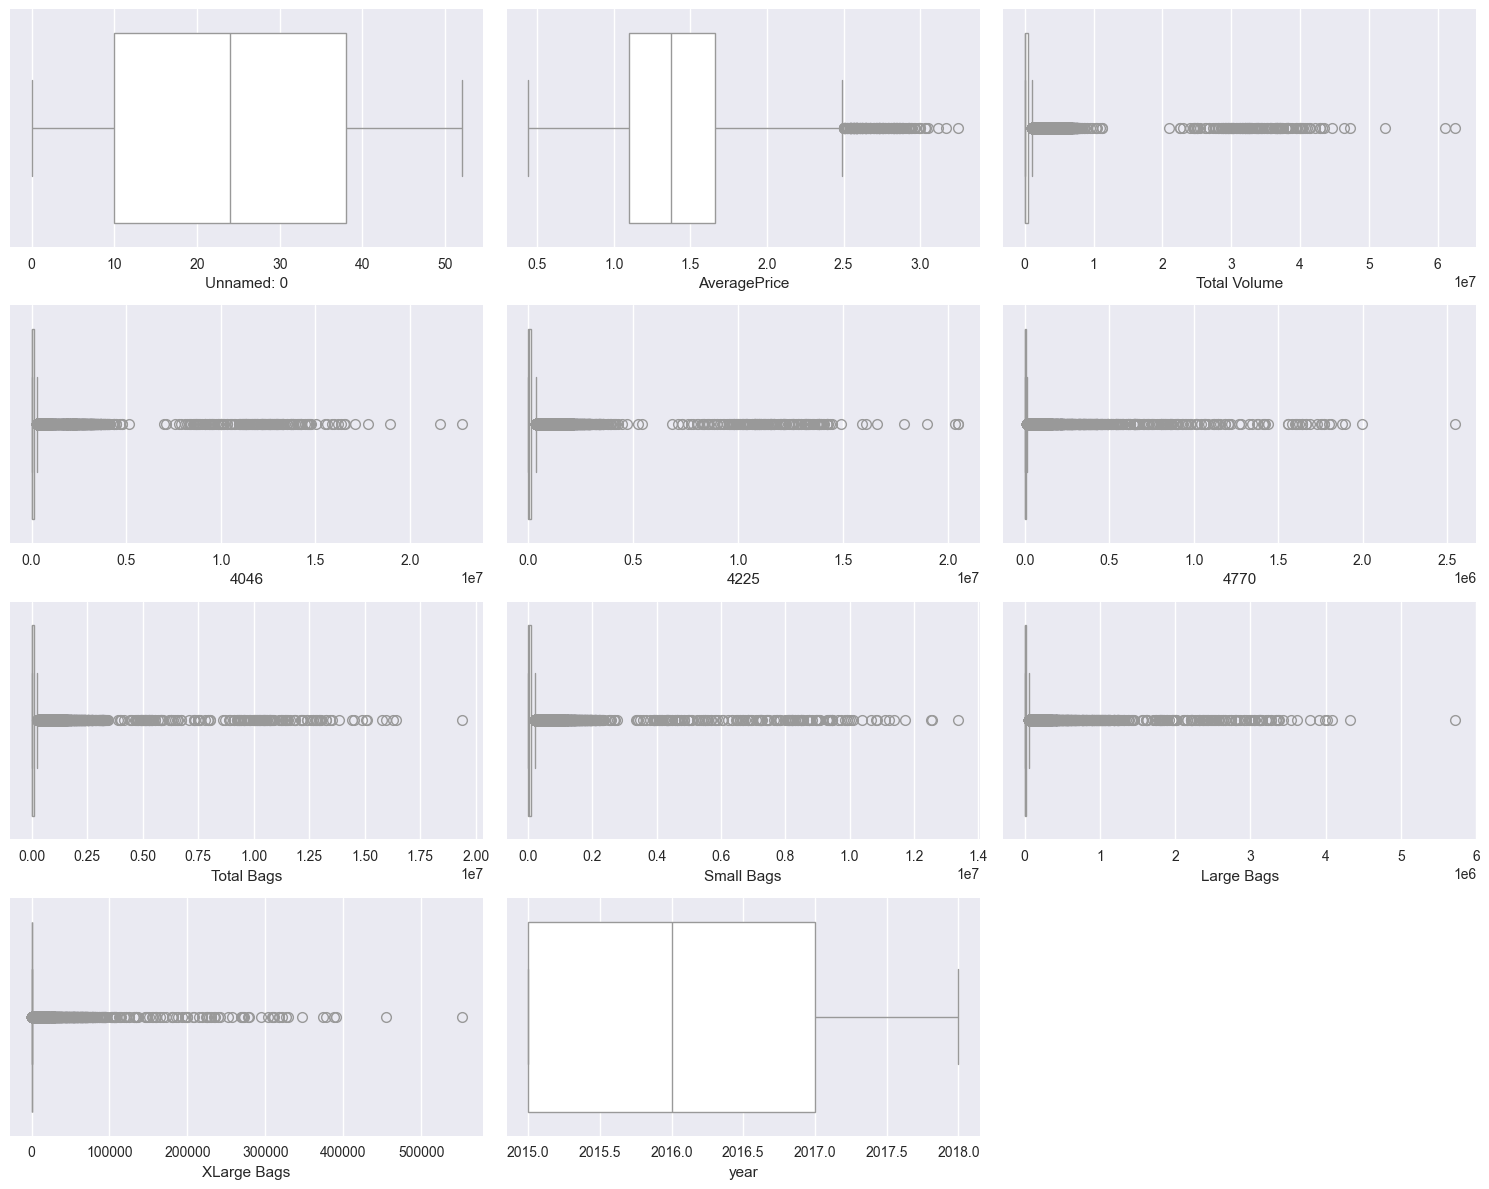

In [73]:
# Boxplots para detectar valores atípicos

fig, axes = plt.subplots(len(num_cols) // 3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='white')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) 
plt.tight_layout()
plt.show()

## Correlación entre Variables
Generamos un mapa de calor para observar las correlaciones entre las variables numéricas y detectar relaciones significativas.

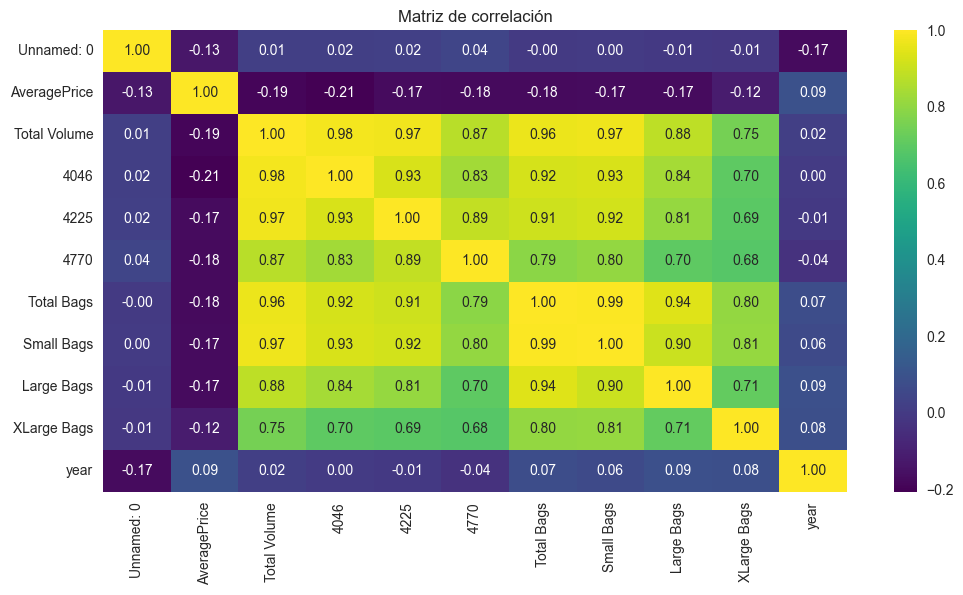

In [74]:
# Heatmap de correlación

corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

## Relación Precio Promedio y Volumen Total
Examinamos con un diagrama de dispersión cómo se relaciona el precio promedio con el volumen total, diferenciando por tipo de aguacate.

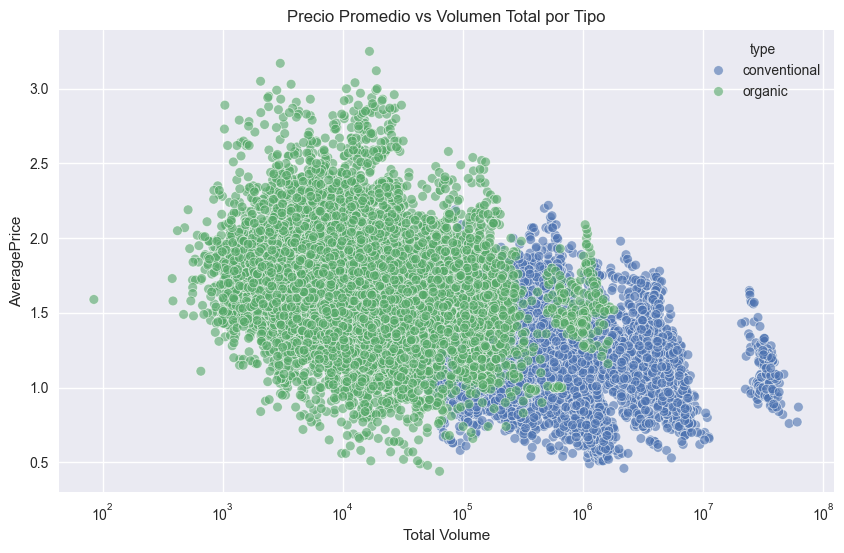

In [75]:
# Diagrama de dispersión entre 'AveragePrice' y 'Total Volume'

plt.figure(figsize=(10, 6))
df_scatter = df[df['Total Volume'] > 0]
sns.scatterplot(data=df_scatter, x='Total Volume', y='AveragePrice', hue='type', alpha=0.6)
plt.title('Precio Promedio vs Volumen Total por Tipo')
plt.xscale('log')
plt.show()

## Distribución de Tipos de Aguacate
Mostramos un gráfico de barras para ver la proporción de cada tipo de aguacate en el dataset.

C:\Users\pbern\AppData\Local\Temp\ipykernel_12144\1824521196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df.copy(), palette='autumn')


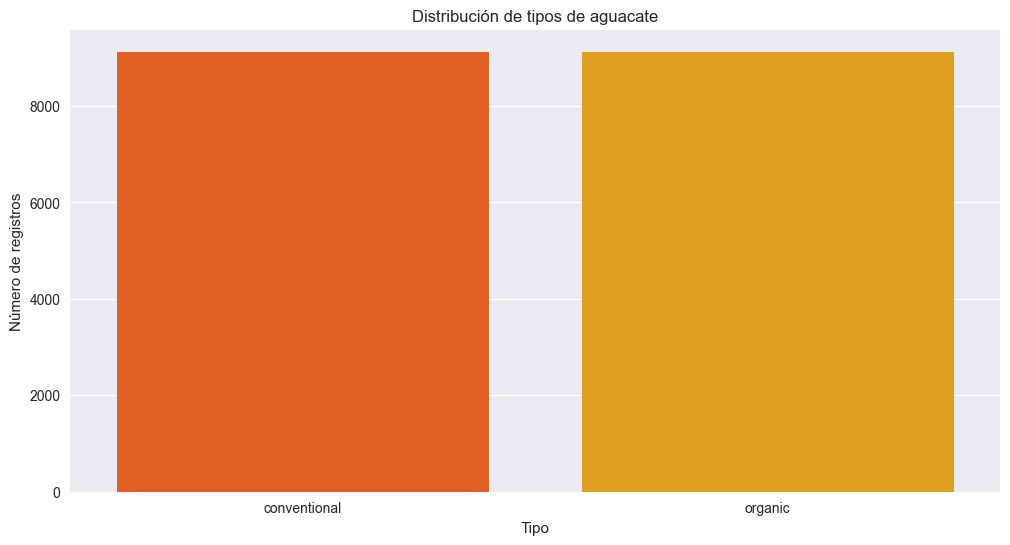

In [76]:
## Distribución de tipo de aguacate
sns.countplot(x='type', data=df.copy(), palette='autumn')
plt.title('Distribución de tipos de aguacate')
plt.xlabel('Tipo')
plt.ylabel('Número de registros')
plt.show()



## Top 10 Regiones por Número de Registros
Identificamos las regiones con mayor número de registros para enfocarnos en las áreas más relevantes del análisis.

C:\Users\pbern\AppData\Local\Temp\ipykernel_12144\2518273781.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='count', data=top_regions_df,


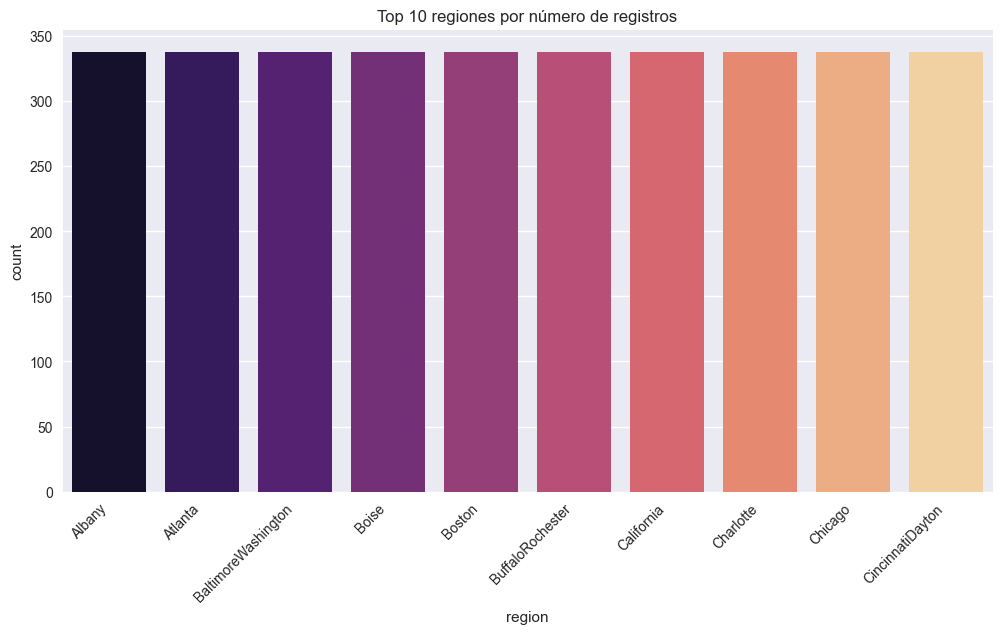

In [77]:
## Top 10 regiones por número de registros

top_regions_counts = df['region'].value_counts().nlargest(10)
top_regions_df = top_regions_counts.reset_index()
top_regions_df.columns = ['region', 'count']

sns.barplot(x='region', y='count', data=top_regions_df,
            palette='magma', order=top_regions_df['region'])
plt.title('Top 10 regiones por número de registros')
plt.xticks(rotation=45, ha='right')
plt.show()


## Evolución Temporal del Precio Promedio
Mostramos cómo ha evolucionado el precio promedio del aguacate a lo largo del tiempo.

C:\Users\pbern\AppData\Local\Temp\ipykernel_12144\3533100660.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='AveragePrice', data=avg_price_time, color='orange', estimator='mean', ci=None)


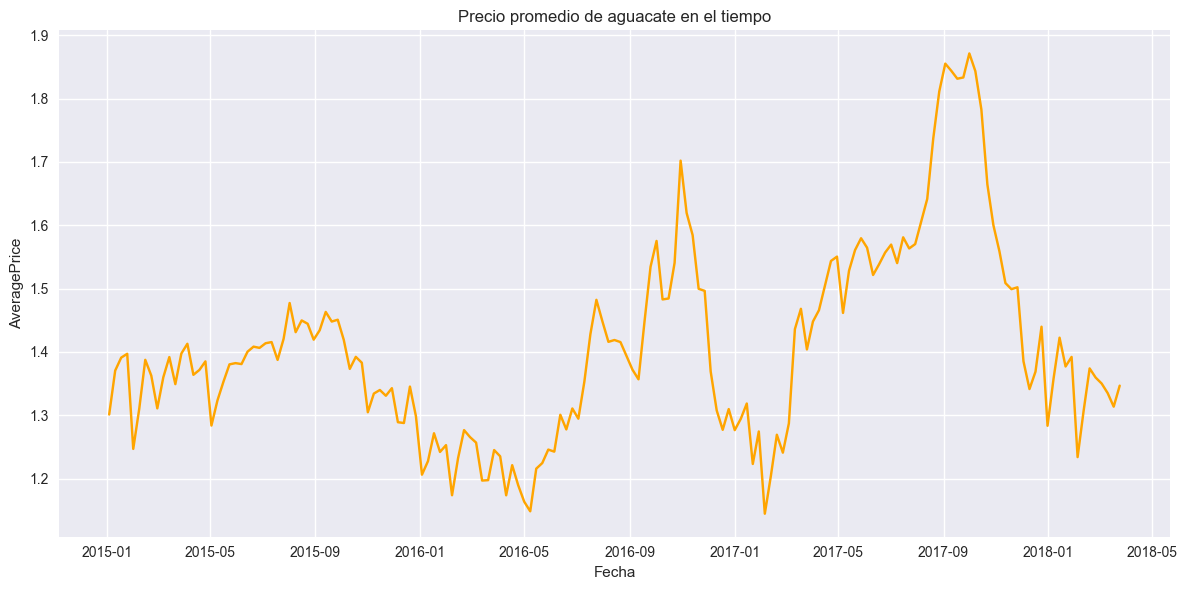

In [78]:
##Evolución temporal del precio promedio
avg_price_time = df.groupby('Date')['AveragePrice'].mean().reset_index()
sns.lineplot(x='Date', y='AveragePrice', data=avg_price_time, color='orange', estimator='mean', ci=None)
plt.title('Precio promedio de aguacate en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('AveragePrice')
plt.tight_layout()
plt.show()

## Distribución de precios promedio por tipo de aguacate
Este violín plot permite visualizar cómo se distribuye el precio promedio según el tipo de aguacate (conventional vs organic). Es útil para detectar diferencias de precios y dispersión.

C:\Users\pbern\AppData\Local\Temp\ipykernel_12144\3637090923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y='AveragePrice', data=df, palette='pastel')


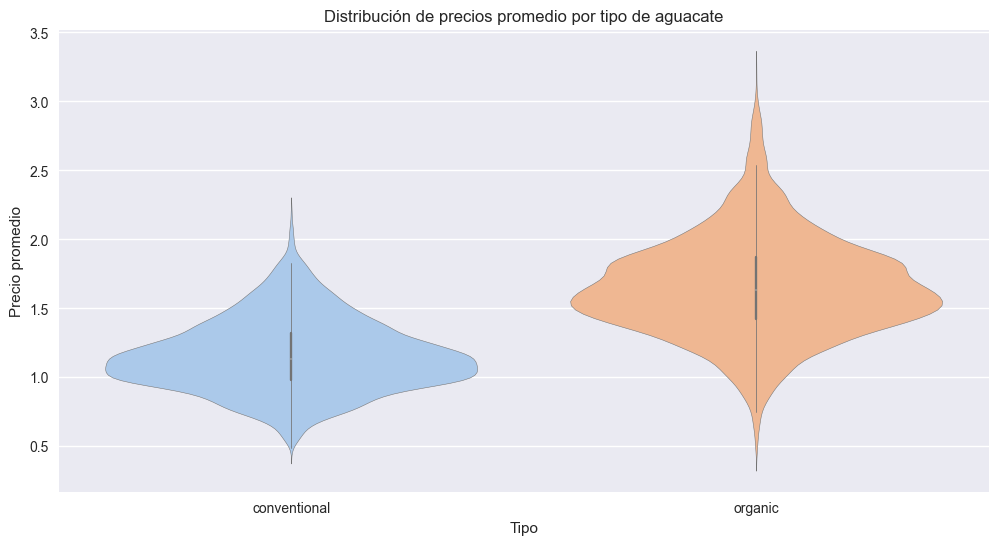

In [79]:
## Distribución de precios promedio por tipo de aguacate

sns.violinplot(x='type', y='AveragePrice', data=df, palette='pastel')
plt.title('Distribución de precios promedio por tipo de aguacate')
plt.xlabel('Tipo')
plt.ylabel('Precio promedio')
plt.show()


## Evolución del precio promedio por tipo de aguacate
Gráfica de líneas que muestra cómo cambia el precio promedio en el tiempo para cada tipo de aguacate. Esto ayuda a identificar tendencias específicas por segmento.

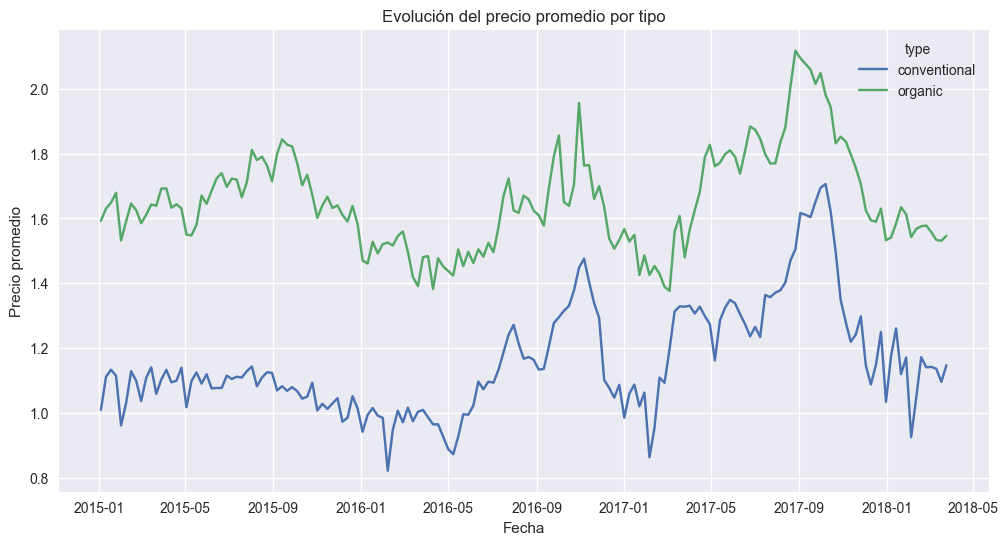

In [80]:
##  Evolución del precio promedio por tipo de aguacate

avg_price_type_time = df.groupby(['Date', 'type'])['AveragePrice'].mean().reset_index()
sns.lineplot(x='Date', y='AveragePrice', hue='type', data=avg_price_type_time)
plt.title('Evolución del precio promedio por tipo')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio')
plt.show()


## Comparación del volumen total por tipo de bolsa
Gráfico de barras que muestra la suma total de Small Bags, Large Bags y XLarge Bags a lo largo de todo el dataset. Permite entender qué tamaños dominan el mercado.

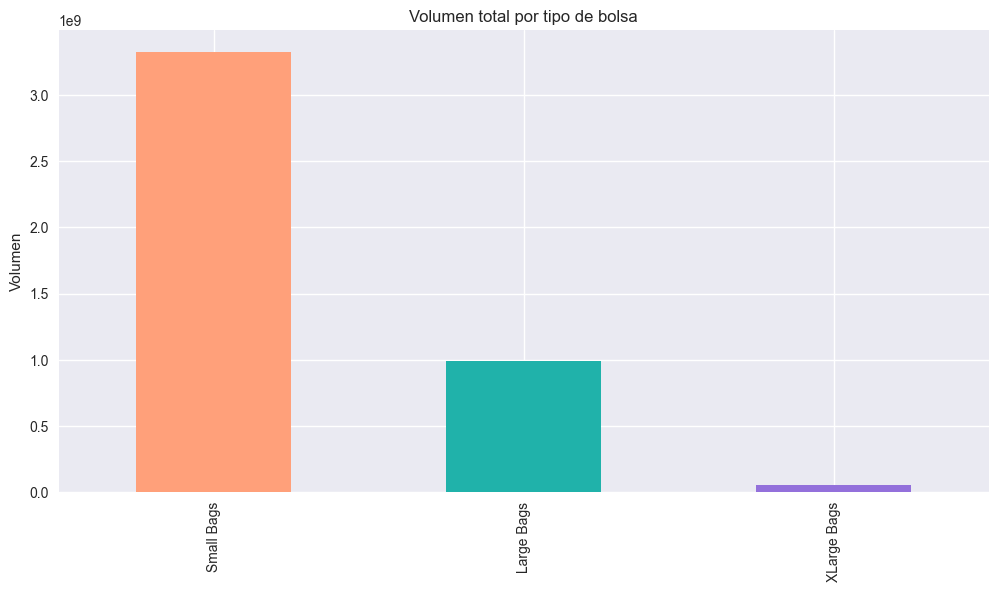

In [81]:
## Comparación del volumen total por tipo de bolsa
bags_sum = df[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()
bags_sum.plot(kind='bar', color=['#FFA07A', '#20B2AA', '#9370DB'])
plt.title('Volumen total por tipo de bolsa')
plt.ylabel('Volumen')
plt.show()

## Mapa de calor de correlaciones completo
Un heatmap que muestra todas las correlaciones entre variables numéricas, destacando relaciones fuertes y débiles. Esto ayuda a descubrir patrones ocultos y dependencias.

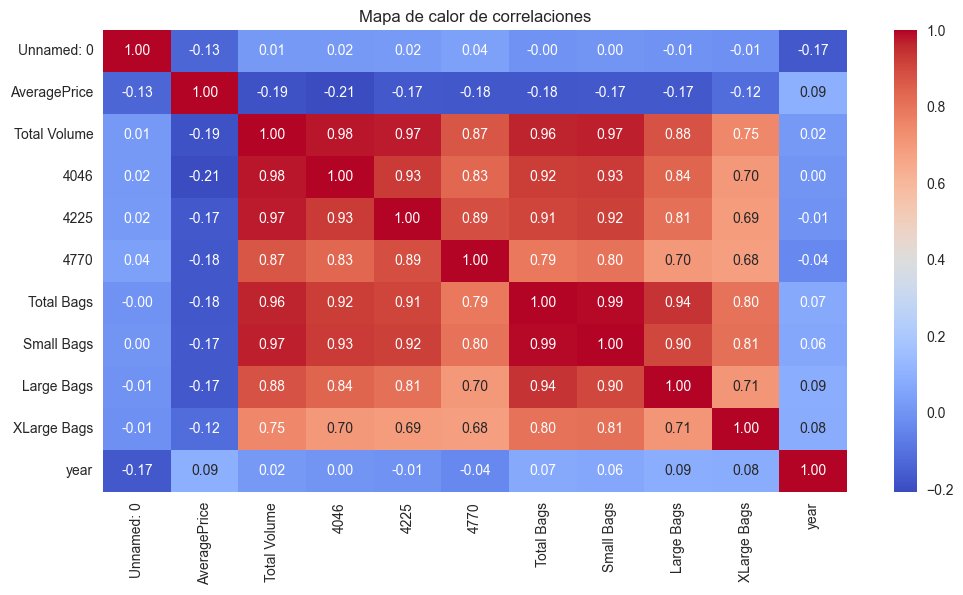

In [84]:
## Mapa de calor de correlaciones completo
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones')
plt.show()

## Distribución del volumen total por tipo
Boxplot que compara la distribución de Total Volume entre aguacates convencionales y orgánicos. Se usa una escala logarítmica para evitar que los valores atípicos distorsionen la visualización.

C:\Users\pbern\AppData\Local\Temp\ipykernel_12144\2677525178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='Total Volume', data=df, palette='Set2')


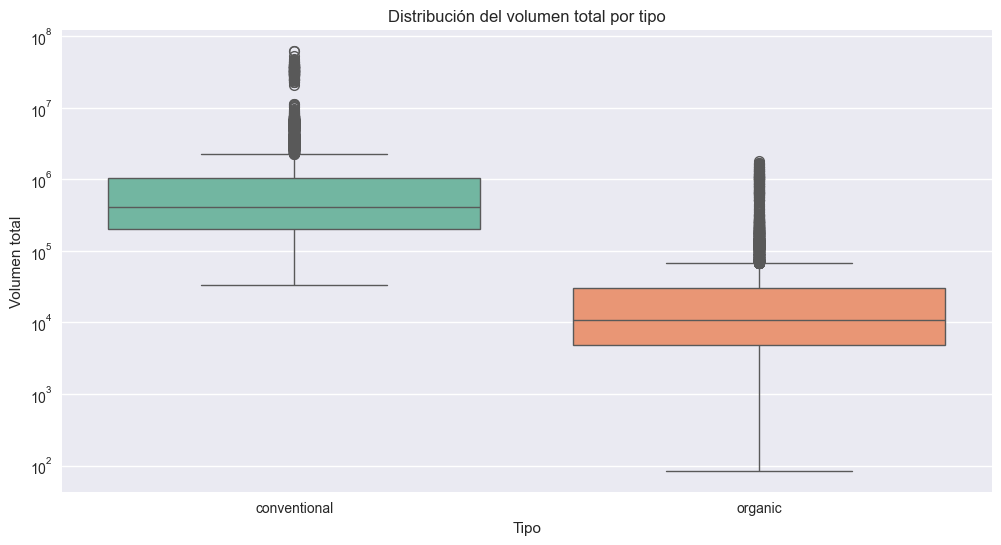

In [83]:
## Boxplot de volumen total por tipo

sns.boxplot(x='type', y='Total Volume', data=df, palette='Set2')
plt.title('Distribución del volumen total por tipo')
plt.xlabel('Tipo')
plt.ylabel('Volumen total')
plt.yscale('log')  # Escala log para evitar distorsión por outliers
plt.show()


## Insights Clave Obtenidos
- El precio promedio del aguacate muestra una tendencia estacional y fluctúa a lo largo de los años.
- La mayoría de los registros corresponden al tipo 'conventional'.
- Las regiones más representadas son las grandes áreas metropolitanas y estados clave.
- Existen algunas correlaciones interesantes, por ejemplo, entre Total Bags y Total Volume.
